## Importar paquetes

In [15]:
# from tensorflow import keras
# from tensorflow.keras import layers

## Cargar datos y explorar datos

Primeramente cargamos los datos desde un dataset real que provee keras. Este dataset contiene imágenes (**x**) con sus respectivas etiquetas (**y**). Note que los 4 resultados (`x_train`, `y_train`, `x_test`,`y_test`) son de tipo ndarray, que es de numpy. 

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(type(x_train), type(y_train), type(x_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


## Explorar un elemento

Exploramos y desplegamos un elemento al azar para entender 

In [4]:
ejemplo_index = 203
x_train[ejemplo_index]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [254, 254, 255],
        [253, 253, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [253, 253, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [255, 255, 255]]

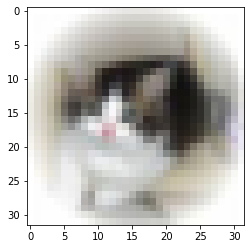

In [5]:
import matplotlib.pyplot as plt

img = plt.imshow(x_train[ejemplo_index])

In [6]:
etiquetas_dataset = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("'Y' valor: ", y_train[ejemplo_index])
print("'Y' palabra: ", etiquetas_dataset[y_train[ejemplo_index][0]])

'Y' valor:  [3]
'Y' palabra:  cat


## Covertir las etiquetas en números

Para realizar el entrenamiento, necesitos valores números únicamente. Sin embargo, como pudimos ver, las etiquetas están en strings. Por lo tanto, ocupamos convetir esas etiquetas a números únicos para cada etiqueta.

In [7]:
from keras.utils import to_categorical

y_train_enteros = to_categorical(y_train)
y_test_enteros = to_categorical(y_test)

print("'Y' valor ententero: ", y_train_enteros[ejemplo_index])

'Y' valor ententero:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Normalizar los pixels a valores entre 0 y 1

La otra preparación que necesitamos hacer es normalizar los valores de las variables **x**.

In [8]:
x_train = x_train / 255
x_test = x_test / 255
x_train[ejemplo_index]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686],
        [0.99607843, 0

## Arquitectura para el modelo

Definimos una arquitectura para el modelo.

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

def construir_modelo():
    modelo = Sequential()
    
    # Primera capa
    modelo.add(Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))

    # Capa pooling
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capa convolution
    modelo.add(Conv2D(32, (5, 5), activation="relu"))

    # Capa pooling
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capa Flattening
    modelo.add(Flatten())

    # Neuronas:
    # 1000 neuronas
    modelo.add(Dense(1000, activation="relu"))

    # Dropout al 50%
    modelo.add(Dropout(0.5))

    # 500 neuronas
    modelo.add(Dense(500, activation="relu"))

    # Dropout al 50%
    modelo.add(Dropout(0.5))

    # 250 neuronas
    modelo.add(Dense(250, activation="relu"))

    # 10 neuronas
    modelo.add(Dense(10, activation="softmax"))
    return modelo

## Compilar modelo

Luego de definir la arquitectura, obtenemos el modelo y lo compilamos para empezar a entrenar y luego predecir.

In [10]:
modelo = construir_modelo()
modelo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Realizamos el entrenamiento

Para realizar el entrenamiento, necesitamos pasarle las imágenes de entrenamiento `x_train`, las etiquetas de entrenamiento en números `y_train_enteros`, y una configuración predeterminada.

In [11]:
entrenamiento = modelo.fit(x_train, y_train_enteros, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 87ms/step - loss: 1.7859 - accuracy: 0.3280 - val_loss: 1.4721 - val_accuracy: 0.4594
Epoch 2/10
157/157 [==============================] - 13s 84ms/step - loss: 1.4193 - accuracy: 0.4816 - val_loss: 1.3398 - val_accuracy: 0.5192
Epoch 3/10
157/157 [==============================] - 13s 84ms/step - loss: 1.2677 - accuracy: 0.5453 - val_loss: 1.2085 - val_accuracy: 0.5714
Epoch 4/10
157/157 [==============================] - 13s 85ms/step - loss: 1.1663 - accuracy: 0.5833 - val_loss: 1.1132 - val_accuracy: 0.6029
Epoch 5/10
157/157 [==============================] - 13s 83ms/step - loss: 1.0709 - accuracy: 0.6204 - val_loss: 1.0381 - val_accuracy: 0.6307
Epoch 6/10
157/157 [==============================] - 13s 80ms/step - loss: 0.9988 - accuracy: 0.6456 - val_loss: 1.0108 - val_accuracy: 0.6416
Epoch 7/10
157/157 [==============================] - 13s 80ms/step - loss: 0.9450 - accuracy: 0.6654 - val_loss: 0.9933 - val_accuracy:

## Evaluación del modelo

Realizamos una evaluación del modelo llamando al método `evaluate`. Note que, ocupamos pasar las imágenes de prueba `x_test` y las etiquetas de prueba `y_test_enteros`. En este caso en particular, la precisión ronda alrededor del 60%.

In [12]:
modelo.evaluate(x_test, y_test_enteros)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9444 - accuracy: 0.6777


0.6776999831199646

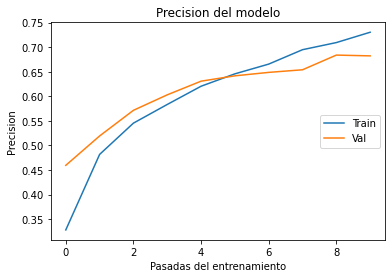

In [13]:
plt.plot(entrenamiento.history["accuracy"])
plt.plot(entrenamiento.history["val_accuracy"])
plt.title("Precision del modelo")
plt.ylabel("Precision")
plt.xlabel("Pasadas del entrenamiento")
plt.legend(["Train", "Val"], loc="right")

## Ejemplo real

### Predicción

In [16]:
from skimage.transform import resize
import numpy as np

def obtener_prediccion(imagen):
    # Cargar imagen y transformarla a 32x32
    nueva_imagen = plt.imread(imagen)
    imagen_pequenna = resize(nueva_imagen, (32,32,3))

    # Realizar prediccion
    prediccion_array = modelo.predict(np.array([imagen_pequenna]))
    return prediccion_array[0]

prediccion_perrito = obtener_prediccion("perrito.jpg")
print(prediccion_perrito)

1/1 [==============================] - 0s 63ms/step
[5.8544060e-04 4.3189264e-04 1.9007558e-02 1.8529430e-01 1.6040569e-02
 7.2683096e-01 2.0568458e-02 2.9538820e-02 2.7615039e-04 1.4259466e-03]


### Desplegar resultados de la predicción

Se define un array `etiquetas_predicciones` de 0 a 9 que representan las etiquetas definidas previamente. Luego, de mayor a menor, tomando en cuenta `prediccion_array`, se ordena `etiquetas_predicciones`. Con este procedimiento, podemos obtener las etiquetas con mejor precisión.

In [17]:
def imprimir_5_predicciones_mejores(prediccion):
    etiquetas_predicciones = [0,1,2,3,4,5,6,7,8,9]

    # Ordenar el array manualmente de acuerdo a prediccion_array de mayor a menos
    for i in range(10):
        for j in range(10):
            if prediccion[etiquetas_predicciones[i]] > prediccion[etiquetas_predicciones[j]]:
                temp = etiquetas_predicciones[i]
                etiquetas_predicciones[i] = etiquetas_predicciones[j]
                etiquetas_predicciones[j] = temp

    print(etiquetas_predicciones)
    for i in range(5):
        print(etiquetas_dataset[etiquetas_predicciones[i]])
        
imprimir_5_predicciones_mejores(prediccion_perrito)

[5, 3, 7, 6, 2, 4, 9, 0, 1, 8]
dog
cat
horse
frog
bird
